<a href="https://colab.research.google.com/github/vimalthomas/deeplearning/blob/main/MNST_Dataloader_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()  # This will prompt you to select and upload the files


Saving train-labels.idx1-ubyte to train-labels.idx1-ubyte
Saving train-images.idx3-ubyte to train-images.idx3-ubyte
Saving t10k-labels.idx1-ubyte to t10k-labels.idx1-ubyte
Saving t10k-images.idx3-ubyte to t10k-images.idx3-ubyte


In [ ]:
import os

# List files in the Colab working directory
os.listdir()


['MLP_Project_v2.ipynb',
 't10k-labels.idx1-ubyte',
 'Multilayerperceptron.ipynb',
 'train-labels.idx1-ubyte',
 '.git',
 'train-images.idx3-ubyte',
 'MLP_Project.ipynb',
 'MLP_Base_Model.ipynb',
 'Multilayerperceptron_v2.ipynb',
 'mlp_project.py',
 'MNST_Dataloader.ipynb',
 't10k-images.idx3-ubyte']

In [ ]:
import numpy as np

def load_mnist_images(filename):
    with open(filename, "rb") as f:
        f.read(16)  # Skip the header (first 16 bytes for images)
        data = np.fromfile(f, dtype=np.uint8)
    return data.reshape(-1, 28 * 28) / 255.0  # Normalize pixel values to [0,1]

def load_mnist_labels(filename):
    with open(filename, "rb") as f:
        f.read(8)  # Skip the header (first 8 bytes for labels)
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

# Load dataset from your uploaded files
train_x = load_mnist_images("train-images.idx3-ubyte")
train_y = load_mnist_labels("train-labels.idx1-ubyte")
test_x = load_mnist_images("t10k-images.idx3-ubyte")
test_y = load_mnist_labels("t10k-labels.idx1-ubyte")

# Print dataset shapes
print(f"Train Images Shape: {train_x.shape}, Train Labels Shape: {train_y.shape}")
print(f"Test Images Shape: {test_x.shape}, Test Labels Shape: {test_y.shape}")


Train Images Shape: (60000, 784), Train Labels Shape: (60000,)
Test Images Shape: (10000, 784), Test Labels Shape: (10000,)


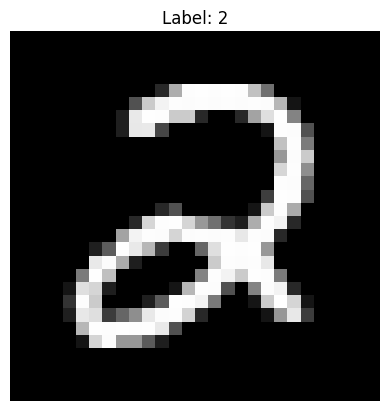

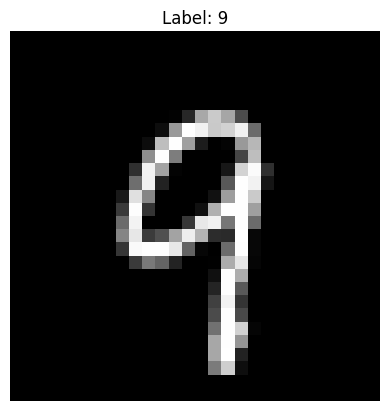

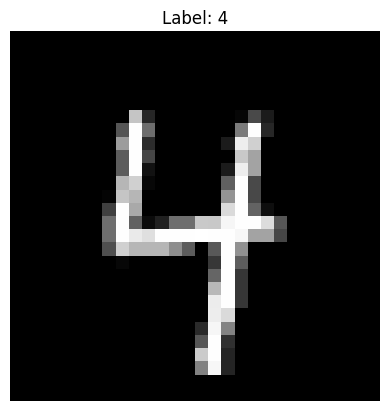

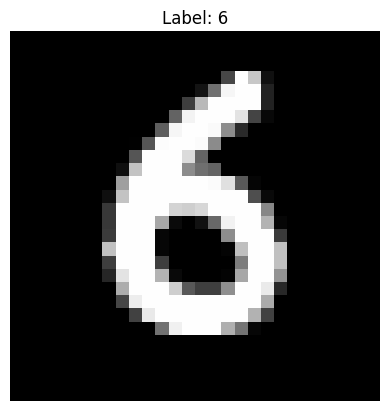

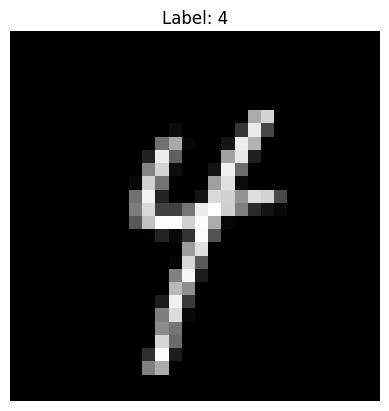

In [ ]:
import matplotlib.pyplot as plt

# Function to visualize an image
def show_image(image_vector, label):
    image = image_vector.reshape(28, 28)  # Reshape from (784,) to (28,28)
    plt.imshow(image, cmap="gray")  # Display the image in grayscale
    plt.title(f"Label: {label}")  # Show the corresponding label
    plt.axis("off")  # Hide axes
    plt.show()

# Show 5 random images
num_samples = 5
indices = np.random.choice(len(train_x), num_samples, replace=False)  # Random indices

for i in indices:
    show_image(train_x[i], train_y[i])  # Show image with corresponding label


In [ ]:
def one_hot_encode(labels, num_classes=10):
    return np.eye(num_classes)[labels]

# Convert labels
train_y_one_hot = one_hot_encode(train_y)
test_y_one_hot = one_hot_encode(test_y)

# Print an example
print(f"Example Label: {train_y[0]}, One-Hot: {train_y_one_hot[0]}")


Example Label: 5, One-Hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
!git clone https://github.com/vimalthomas/deeplearning.git
%cd deeplearning/

# Run the previous notebook
%run "Multilayerperceptron_drop.ipynb"

Cloning into 'deeplearning'...
remote: Enumerating objects: 129, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (128/128), done.
remote: Total 129 (delta 80), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (129/129), 155.52 KiB | 1.13 MiB/s, done.
Resolving deltas: 100% (80/80), done.
/content/deeplearning/deeplearning/deeplearning/deeplearning/deeplearning/deeplearning/deeplearning/deeplearning/deeplearning/deeplearning/deeplearning/deeplearning/deeplearning


In [ ]:
# Check the shapes of training and test data
print(f"Train X shape: {train_x.shape}, Train Y shape: {train_y_one_hot.shape}")
print(f"Test X shape: {test_x.shape}, Test Y shape: {test_y_one_hot.shape}")


Train X shape: (60000, 784), Train Y shape: (60000, 10)
Test X shape: (10000, 784), Test Y shape: (10000, 10)


In [ ]:
training_losses,validation_losses=[],[]

In [ ]:
print(training_losses)

[]


In [ ]:
# Define the MLP architecture
mlp = MultilayerPerceptron([
    Layer(784, 128, Relu(),dropout_rate=0.1),  # Input (784) → Hidden (128) with ReLU
    Layer(128, 64, Relu(),dropout_rate=0.1),   # Hidden (128) → Hidden (64) with ReLU
    Layer(64, 10, Softmax())  # Hidden (64) → Output (10) with Softmax
])

# Define the loss function
loss_function = CrossEntropy()

# Train the model
training_losses, validation_losses = mlp.train(
    train_x, train_y_one_hot,  # Train Data
    test_x, test_y_one_hot,    # Validation Data
    loss_function,
    learning_rate=0.005,
    batch_size=32,
    epochs=50, # Adjust epochs as needed
    model_type='classification'

)

Epoch 1/50 - Training Loss: 0.9027 - Training Acc: 85.20% - Validation Acc: 86.27% - Validation Loss: 0.3886
Epoch 2/50 - Training Loss: 0.4416 - Training Acc: 88.62% - Validation Acc: 89.28% - Validation Loss: 0.2976
Epoch 3/50 - Training Loss: 0.3617 - Training Acc: 90.29% - Validation Acc: 90.63% - Validation Loss: 0.2575
Epoch 4/50 - Training Loss: 0.3177 - Training Acc: 91.29% - Validation Acc: 91.58% - Validation Loss: 0.2291
Epoch 5/50 - Training Loss: 0.2855 - Training Acc: 91.97% - Validation Acc: 92.47% - Validation Loss: 0.2108
Epoch 6/50 - Training Loss: 0.2631 - Training Acc: 92.64% - Validation Acc: 92.67% - Validation Loss: 0.1936
Epoch 7/50 - Training Loss: 0.2429 - Training Acc: 93.18% - Validation Acc: 93.36% - Validation Loss: 0.1822
Epoch 8/50 - Training Loss: 0.2280 - Training Acc: 93.63% - Validation Acc: 93.74% - Validation Loss: 0.1691
Epoch 9/50 - Training Loss: 0.2128 - Training Acc: 94.04% - Validation Acc: 93.92% - Validation Loss: 0.1606
Epoch 10/50 - Train

In [ ]:
print(training_losses)

[0.9027133145680889, 0.4415964301152313, 0.36167522773289795, 0.31774105745408243, 0.28548340021445356, 0.2631220340957457, 0.2429153332499564, 0.22798732296313545, 0.21280183837426841, 0.20191117480690182, 0.19082241234752512, 0.18350413270622304, 0.1764055332595562, 0.16933793890275997, 0.16126248312202834, 0.15579560458053066, 0.1500748791639147, 0.1449276988321915, 0.1399826661348244, 0.13511505280279695, 0.13145841750639775, 0.12758881532383023, 0.1236789907038996, 0.12073485606765381, 0.11721078726572626, 0.11371277140516005, 0.11169356666937727, 0.10904810703642435, 0.10506443733441406, 0.10365735775100346, 0.1005083432758888, 0.0994238324194618, 0.09608305650423689, 0.09549626951379646, 0.09256780957298251, 0.09072974252457652, 0.08912626814863792, 0.08869491631742388, 0.08641420591914258, 0.08429937319508111, 0.08350514040237904, 0.0819148808284025, 0.0799425066726557, 0.0782860616641647, 0.07678331272137413, 0.07608352904573759, 0.07416391893735733, 0.0733202539828465, 0.0714

In [ ]:
# Compute test accuracy
test_accuracy = compute_accuracy(mlp, test_x, test_y_one_hot)
print(f"Test Accuracy: {test_accuracy:.2f}%")


Test Accuracy: 96.84%


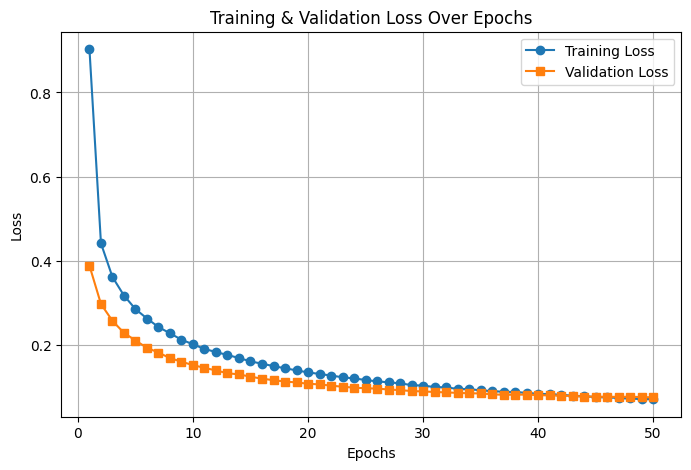

In [ ]:
import matplotlib.pyplot as plt

# Function to plot training & validation losses
def plot_losses(training_losses, validation_losses):
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(training_losses) + 1), training_losses, label="Training Loss", marker="o")
    plt.plot(range(1, len(validation_losses) + 1), validation_losses, label="Validation Loss", marker="s")

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training & Validation Loss Over Epochs")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the loss curves
plot_losses(training_losses, validation_losses)


In [ ]:
print(training_losses)

[0.9027133145680889, 0.4415964301152313, 0.36167522773289795, 0.31774105745408243, 0.28548340021445356, 0.2631220340957457, 0.2429153332499564, 0.22798732296313545, 0.21280183837426841, 0.20191117480690182, 0.19082241234752512, 0.18350413270622304, 0.1764055332595562, 0.16933793890275997, 0.16126248312202834, 0.15579560458053066, 0.1500748791639147, 0.1449276988321915, 0.1399826661348244, 0.13511505280279695, 0.13145841750639775, 0.12758881532383023, 0.1236789907038996, 0.12073485606765381, 0.11721078726572626, 0.11371277140516005, 0.11169356666937727, 0.10904810703642435, 0.10506443733441406, 0.10365735775100346, 0.1005083432758888, 0.0994238324194618, 0.09608305650423689, 0.09549626951379646, 0.09256780957298251, 0.09072974252457652, 0.08912626814863792, 0.08869491631742388, 0.08641420591914258, 0.08429937319508111, 0.08350514040237904, 0.0819148808284025, 0.0799425066726557, 0.0782860616641647, 0.07678331272137413, 0.07608352904573759, 0.07416391893735733, 0.0733202539828465, 0.0714

In [ ]:
import numpy as np

# Get predictions on test data
test_predictions = mlp.forward(test_x)
test_pred_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(test_y_one_hot, axis=1)

# Compute per-class accuracy
unique_classes = np.unique(test_true_classes)
for cls in unique_classes:
    cls_mask = test_true_classes == cls
    cls_accuracy = np.mean(test_pred_classes[cls_mask] == test_true_classes[cls_mask]) * 100
    print(f"Accuracy for digit {cls}: {cls_accuracy:.2f}%")


Accuracy for digit 0: 98.78%
Accuracy for digit 1: 98.59%
Accuracy for digit 2: 96.32%
Accuracy for digit 3: 96.83%
Accuracy for digit 4: 97.25%
Accuracy for digit 5: 96.30%
Accuracy for digit 6: 97.70%
Accuracy for digit 7: 96.01%
Accuracy for digit 8: 96.00%
Accuracy for digit 9: 94.25%


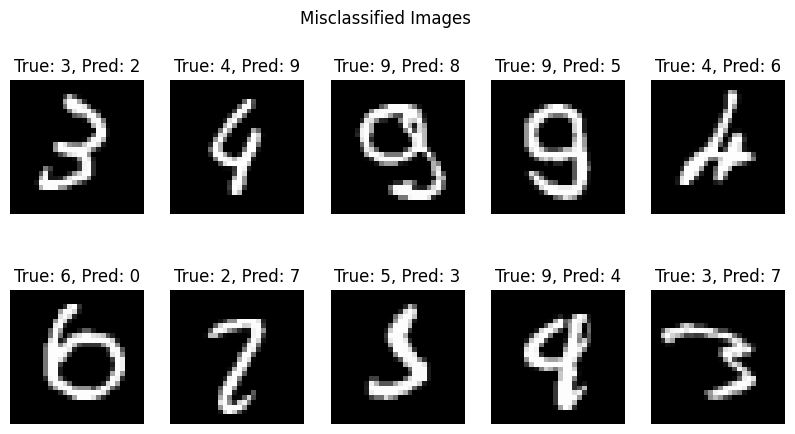

In [ ]:
import matplotlib.pyplot as plt

# Get predictions
test_predictions = mlp.forward(test_x)
test_pred_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(test_y_one_hot, axis=1)

# Find misclassified indices
misclassified = np.where(test_pred_classes != test_true_classes)[0]

# Plot a few misclassified samples
num_samples = 10  # Number of misclassified images to show
plt.figure(figsize=(10, 5))

for i, idx in enumerate(misclassified[:num_samples]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_x[idx].reshape(28, 28), cmap="gray")  # Reshape and display
    plt.title(f"True: {test_true_classes[idx]}, Pred: {test_pred_classes[idx]}")
    plt.axis("off")

plt.suptitle("Misclassified Images")
plt.show()


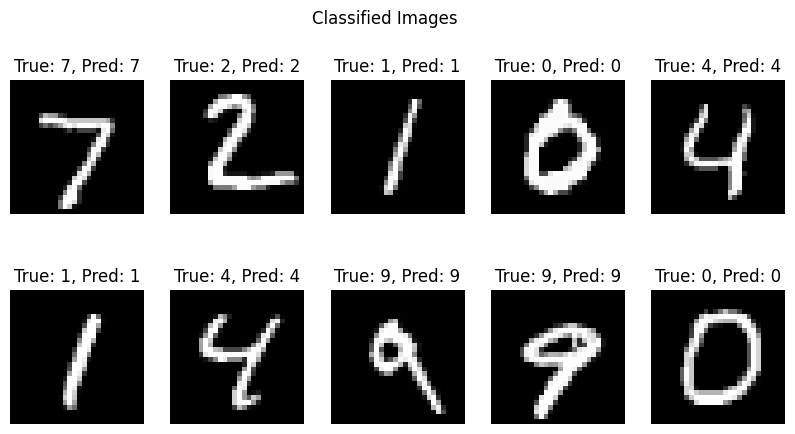

In [ ]:
import matplotlib.pyplot as plt

# Get predictions
test_predictions = mlp.forward(test_x)
test_pred_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(test_y_one_hot, axis=1)

# Find misclassified indices
classified = np.where(test_pred_classes == test_true_classes)[0]

# Plot a few classified samples
num_samples = 10  # Number of classified images to show
plt.figure(figsize=(10, 5))

for i, idx in enumerate(classified[:num_samples]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_x[idx].reshape(28, 28), cmap="gray")  # Reshape and display
    plt.title(f"True: {test_true_classes[idx]}, Pred: {test_pred_classes[idx]}")
    plt.axis("off")

plt.suptitle("Classified Images")
plt.show()


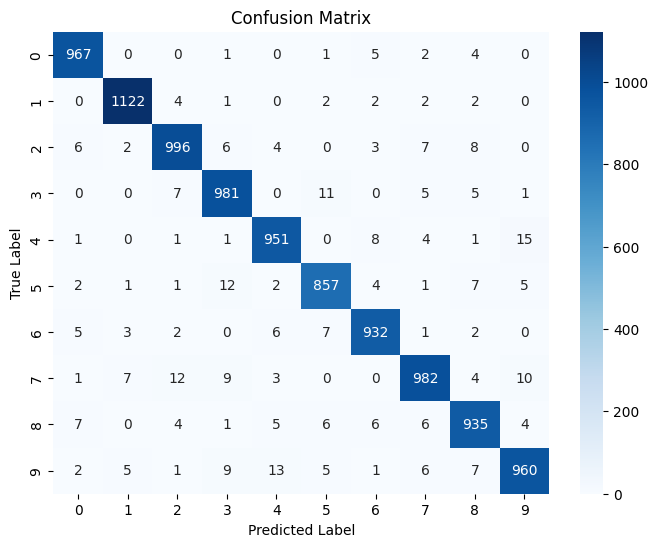

In [ ]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(test_true_classes, test_pred_classes)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
print(type(training_losses))

<class 'list'>
